# Spotify Popularity Prediction

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Data Preparation and Analysis

In [2]:
#load the data
spotify_song_data= pd.read_csv("song_data.csv")
spotify_song_info= pd.read_csv("song_info.csv") 

In [3]:
song_info=spotify_song_info.copy()
song_data=spotify_song_data.copy()
song_data.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [4]:
song_data.shape

(18835, 15)

### Cleaning Data

In [5]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [6]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

### Analysis

In [7]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18835 non-null int64
song_duration_ms    18835 non-null int64
acousticness        18835 non-null float64
danceability        18835 non-null float64
energy              18835 non-null float64
instrumentalness    18835 non-null float64
key                 18835 non-null int64
liveness            18835 non-null float64
loudness            18835 non-null float64
audio_mode          18835 non-null int64
speechiness         18835 non-null float64
tempo               18835 non-null float64
time_signature      18835 non-null int64
audio_valence       18835 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [8]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

In [9]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [10]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

In [11]:
#popular songs' data
a=song_data[song_data["popularity"]==1]
a.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.00000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.0
mean,76.992292,218539.555515,0.210354,0.659758,0.658601,0.022390,5.11782,0.174400,-6.624852,0.618829,0.106247,120.753878,3.974307,0.520436,1.0
std,8.068717,48620.048311,0.246079,0.147652,0.187495,0.115572,3.65752,0.137557,3.139341,0.485719,0.102181,27.737971,0.255771,0.230911,0.0
min,67.000000,67000.000000,0.000009,0.072200,0.002890,0.000000,0.00000,0.021500,-34.255000,0.000000,0.022400,57.178000,1.000000,0.035200,1.0
25%,71.000000,190185.000000,0.026300,0.562000,0.541000,0.000000,1.00000,0.092000,-7.906000,0.000000,0.039100,98.883000,4.000000,0.336000,1.0
50%,75.000000,212429.000000,0.106000,0.668000,0.680000,0.000000,5.00000,0.121000,-5.985000,1.000000,0.059100,119.886000,4.000000,0.511000,1.0
75%,82.000000,240533.000000,0.300000,0.765000,0.802000,0.000118,8.00000,0.203000,-4.626000,1.000000,0.131000,139.910000,4.000000,0.701000,1.0
max,100.000000,547733.000000,0.996000,0.978000,0.997000,0.968000,11.00000,0.978000,-0.739000,1.000000,0.733000,212.058000,5.000000,0.980000,1.0


In [12]:
song_data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.699048
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.003494
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.106483
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.107519
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.040548
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.160144
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.030251
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.023265
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.137111
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.012290


### Categorical Variable Analysis

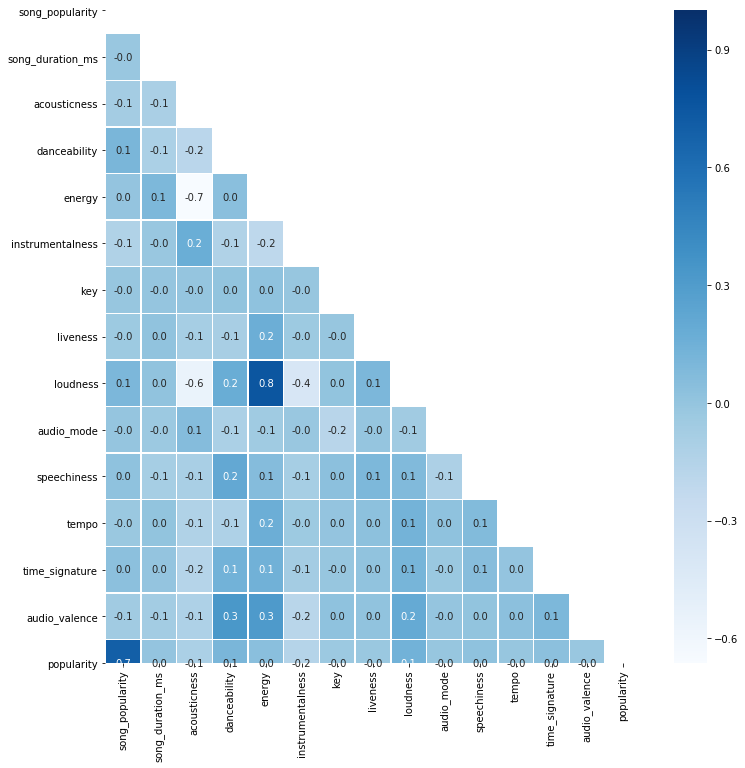

In [13]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

In [14]:
def bar_plot(variable):
    
    var=song_data[variable]
    var_value= var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="orange")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))

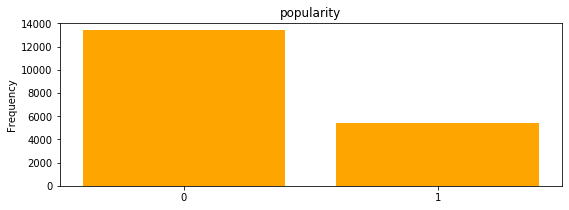

popularity:
0    13386
1     5449
Name: popularity, dtype: int64


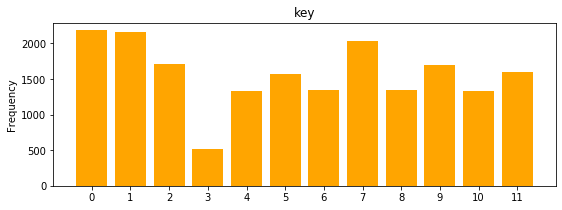

key:
0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: key, dtype: int64


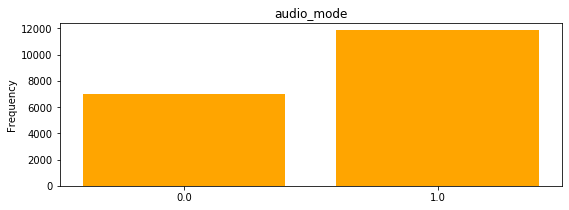

audio_mode:
1.0    11831
0.0     7004
Name: audio_mode, dtype: int64


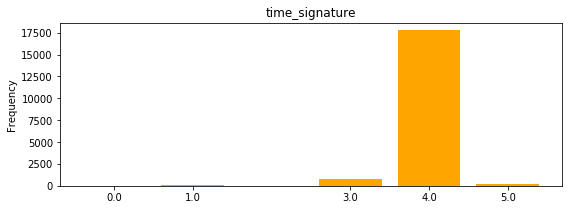

time_signature:
4.0    17754
3.0      772
5.0      233
1.0       73
0.0        3
Name: time_signature, dtype: int64


In [15]:
category1 = ["popularity","key","audio_mode","time_signature"]
for c in category1:
    bar_plot(c)

### Basic Data Analysis

In [16]:
# key vs popularity
song_data[["key","popularity"]].groupby(["key"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,key,popularity
1,1,0.356285
6,6,0.321984
0,0,0.303850
5,5,0.300508
11,11,0.293750
8,8,0.292068
4,4,0.284853
10,10,0.280992
2,2,0.265889
9,9,0.253828


In [17]:
# audio_mode vs popularity
song_data[["audio_mode","popularity"]].groupby(["audio_mode"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,audio_mode,popularity
0,0.0,0.296545
1,1.0,0.285014


In [18]:
# time_signature vs popularity
song_data[["time_signature","popularity"]].groupby(["time_signature"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,time_signature,popularity
4,5.0,0.304721
3,4.0,0.292497
2,3.0,0.222798
1,1.0,0.178082
0,0.0,0.000000


In [19]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [20]:
song_data.loc[detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"])]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
232,La Maza,58,351400.0,0.6520,0.555,0.331,0.000012,9,0.235,-17.718,0.0,0.2700,170.603,3.0,0.437,0
253,Whole Lotta Love,77,333893.0,0.0484,0.412,0.902,0.131000,9,0.405,-11.600,1.0,0.4050,89.740,4.0,0.422,1
501,Do You Feel Like We Do,48,836666.0,0.0439,0.295,0.568,0.011700,0,0.977,-8.232,1.0,0.0284,98.284,4.0,0.384,0
981,The Times They Are A-Changin' - Live at Sony M...,49,348560.0,0.6300,0.393,0.416,0.007910,9,0.986,-13.243,1.0,0.0401,163.604,3.0,0.512,0
1113,November Rain,38,537506.0,0.0165,0.197,0.629,0.279000,11,0.125,-9.291,1.0,0.0300,79.495,4.0,0.221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15247,I Know You So Well,8,102661.0,0.9230,0.679,0.311,0.721000,0,0.813,-16.557,0.0,0.1050,60.724,4.0,0.304,0
16642,same stars,46,116918.0,0.2510,0.687,0.284,0.862000,0,0.496,-19.504,1.0,0.0378,115.996,4.0,0.159,0
17723,Dutch Spring,0,205623.0,0.1960,0.510,0.843,0.135000,6,0.569,-4.958,0.0,0.3910,83.355,4.0,0.832,0
3720,Racism And Injustice,21,260160.0,0.9220,0.650,0.316,0.000000,9,0.739,-18.244,0.0,0.9400,117.198,4.0,0.306,0


In [21]:
# drop outliers
song_data = song_data.drop(detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"]),axis = 0).reset_index(drop = True)

In [22]:
song_data[song_data["audio_mode"].isnull()]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity


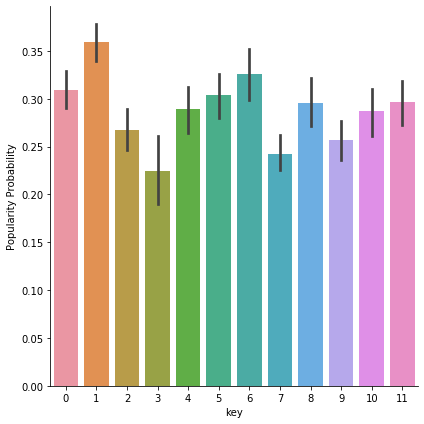

In [23]:
g = sns.factorplot(x = "key", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

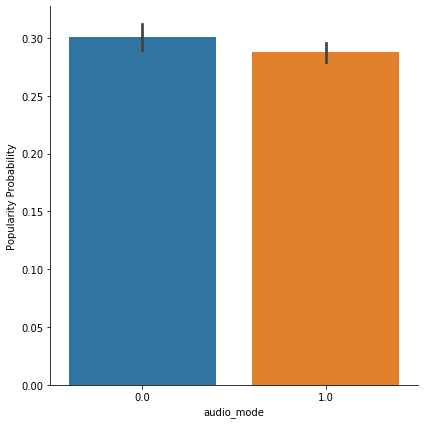

In [24]:
g = sns.factorplot(x = "audio_mode", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

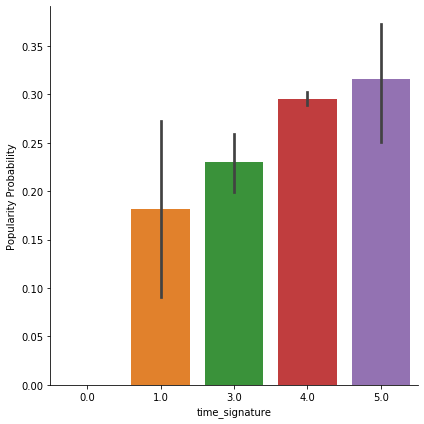

In [25]:
g = sns.factorplot(x = "time_signature", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

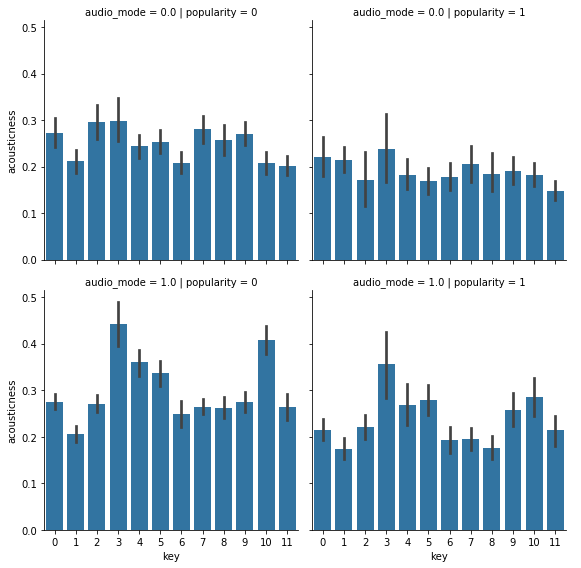

In [26]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "acousticness")
g.add_legend()
plt.show()

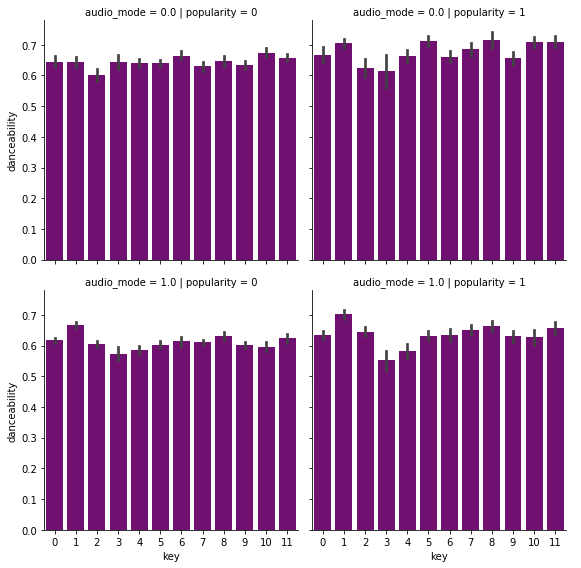

In [27]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "danceability",color="purple")
g.add_legend()
plt.show()

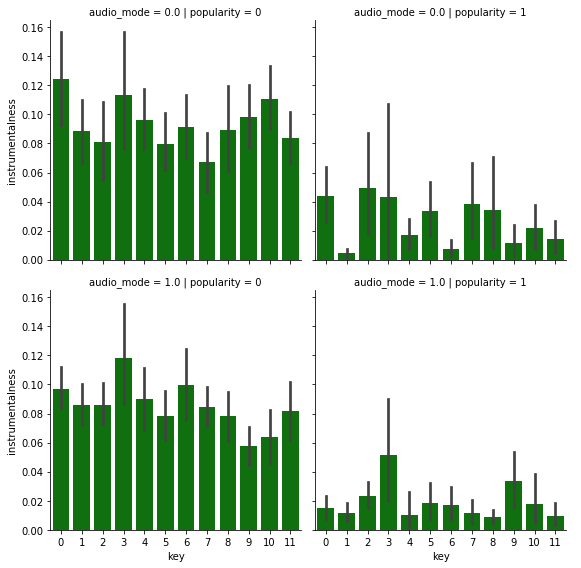

In [28]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "instrumentalness",color="green")
g.add_legend()
plt.show()

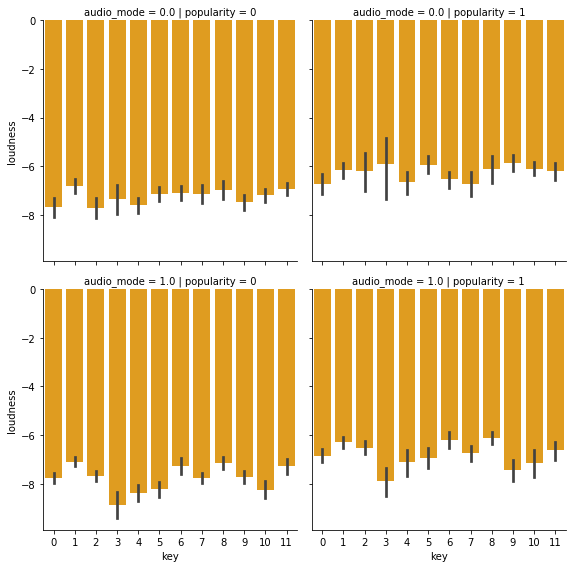

In [29]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "loudness",color="orange")
g.add_legend()
plt.show()

### Features Distribution

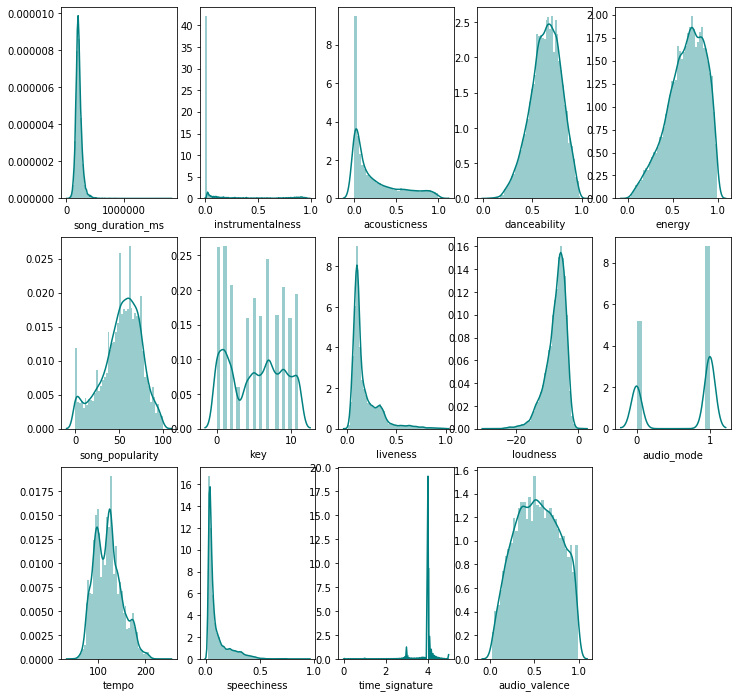

In [30]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( song_data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

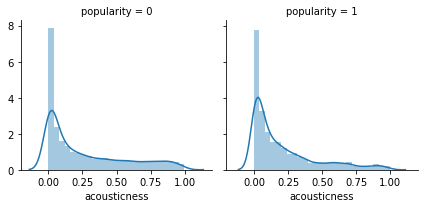

In [31]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()

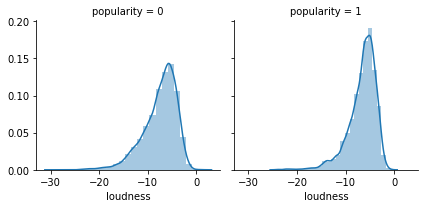

In [32]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "loudness", bins = 25)
plt.show()

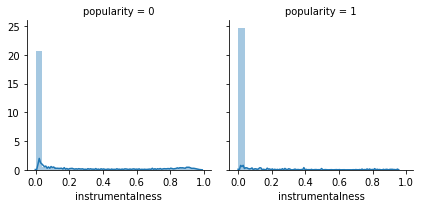

In [33]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()

#### All Songs

In [34]:
song_data3=song_data.copy()
song_data3["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data.audio_valence ]
song_data3["song_audio_valence"].value_counts()

Happy    10047
Sad       8463
Name: song_audio_valence, dtype: int64

#### Populer Songs

In [35]:
song_data1=song_data3[song_data3["song_popularity"]>66.5]
song_data1["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data1.audio_valence ]
song_data1["song_audio_valence"].value_counts()

Happy    2845
Sad      2574
Name: song_audio_valence, dtype: int64

#### Top 500

In [36]:
song_data2_new=song_data1[song_data1["song_popularity"]>90]
song_data2_new["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data2_new.audio_valence ]
song_data2_new["song_audio_valence"].value_counts()

Sad      332
Happy    167
Name: song_audio_valence, dtype: int64

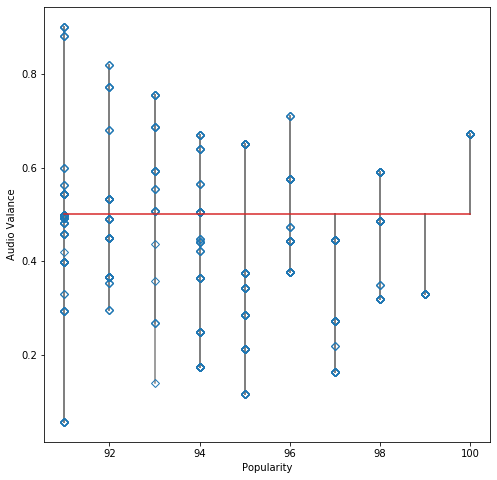

In [37]:
song_data2= song_data2_new[song_data2_new.popularity==1]
a=song_data2.iloc[:,1]
a.to_numpy()
b=song_data2.iloc[:,14]
b.to_numpy()
plt.figure(figsize=[8,8])
markerline, stemlines, baseline = plt.stem(
    a, b, linefmt='grey', markerfmt='D', bottom=0.5)
markerline.set_markerfacecolor('none')
plt.xlabel("Popularity")
plt.ylabel("Audio Valance")
plt.show()

In [38]:
new_data = pd.concat([song_info, song_data1],axis=1)
new_data=new_data[new_data["song_popularity"]>90]

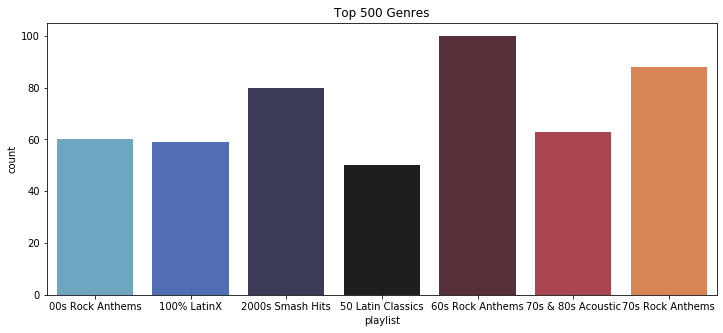

In [39]:
# Top 500 Playlists Gender
plt.figure(figsize=(12,5))
new_data= song_info['playlist'].head(500)
g = sns.countplot(new_data, palette="icefire")
plt.title("Top 500 Genres")
plt.show()

### Feature Engineering

In [40]:
spotify_song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in spotify_song_data.song_popularity ]
spotify_song_data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

In [41]:
data_plr = pd.concat([spotify_song_data.popularity,spotify_song_data.song_name],axis=1)
data_plr.head()

,popularity,song_name
0,1,Boulevard of Broken Dreams
1,0,In The End
2,1,Seven Nation Army
3,1,By The Way
4,0,How You Remind Me


In [42]:
song_data['song_name'].value_counts(dropna=False)
song_data['song_name'].dropna(inplace=True)

In [43]:
import re
import nltk 
import nltk as nlp

nltk.download("stopwords") 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
Song_Name = [ word for word in spotify_song_data.song_name if not word in set(stopwords.words("english"))]
lemma = nlp.WordNetLemmatizer()
Song_Name = [ lemma.lemmatize(word) for word in Song_Name] 

In [45]:
Song_Name_list = []
for Song_Name in data_plr.song_name:
    Song_Name = re.sub("[^a-zA-Z]"," ",Song_Name)
    Song_Name = Song_Name.lower() 
    Song_Name = nltk.word_tokenize(Song_Name)
    lemma = nlp.WordNetLemmatizer()
    Song_Name = [ lemma.lemmatize(word) for word in Song_Name]
    Song_Name = " ".join(Song_Name)
    Song_Name_list.append(Song_Name)

In [46]:
# %% bag of words
from sklearn.feature_extraction.text import CountVectorizer
max_features = 10
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(Song_Name_list).toarray()  
print("en sik kullanilan {} kelimeler: {}".format(max_features,count_vectorizer.get_feature_names()))

en sik kullanilan 10 kelimeler: ['don', 'edit', 'feat', 'la', 'like', 'love', 'radio', 'remastered', 'remix', 'version']


In [47]:
 a = count_vectorizer.get_feature_names()

In [48]:
df=pd.DataFrame(Song_Name_list,columns=['Names'])

In [49]:
artist= song_info.artist_name.tolist()
name_count = Counter(artist)         
most_common_names2 = name_count.most_common(10) 
most_common_names2

[('Kanye West', 82),
 ('Lady Gaga', 78),
 ('Drake', 68),
 ('Khalid', 61),
 ('Eminem', 47),
 ('6ix9ine', 45),
 ('David Guetta', 45),
 ('Calvin Harris', 40),
 ('The Chainsmokers', 40),
 ('Lil Wayne', 39)]

### Sentiment Analysis

In [50]:
from textblob import TextBlob
data_plr['sentiment'] = data_plr['song_name'].map(lambda text: TextBlob(text).sentiment.polarity)

In [51]:
data_plr.head()

,popularity,song_name,sentiment
0,1,Boulevard of Broken Dreams,-0.4
1,0,In The End,0.0
2,1,Seven Nation Army,0.0
3,1,By The Way,0.0
4,0,How You Remind Me,0.0


In [52]:
import numpy as np
cut = pd.cut(
    data_plr['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
data_plr['polarity'] = cut.values
data_plr[['polarity','sentiment']].head()

,polarity,sentiment
0,negative,-0.4
1,neutral,0.0
2,neutral,0.0
3,neutral,0.0
4,neutral,0.0


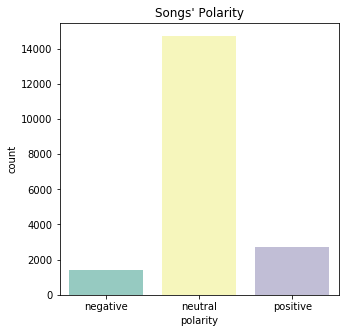

In [53]:
plt.figure(figsize=(5,5))
data= data_plr.polarity
g = sns.countplot(data, palette="Set3")
plt.title("Songs' Polarity")
plt.show()

In [54]:
song_data =pd.concat([song_data,data_plr.sentiment],axis=1)
song_data.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity,sentiment
0,Boulevard of Broken Dreams,73.0,262333.0,0.00552,0.496,0.682,0.000029,8.0,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,1.0,-0.4
1,In The End,66.0,216933.0,0.01030,0.542,0.853,0.000000,3.0,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,0.0,0.0
2,Seven Nation Army,76.0,231733.0,0.00817,0.737,0.463,0.447000,0.0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,1.0,0.0


In [55]:
song_data["key"] = song_data["key"].astype("category")
song_data = pd.get_dummies(song_data, columns=["key"])
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,...,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1.0,...,0,0,0,0,0,0,1,0,0,0
1,In The End,66.0,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0,...,0,1,0,0,0,0,0,0,0,0
2,Seven Nation Army,76.0,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,1.0,...,0,0,0,0,0,0,0,0,0,0
3,By The Way,74.0,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1.0,...,0,0,0,0,0,0,0,0,0,0
4,How You Remind Me,56.0,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1.0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
song_data["audio_mode"] = song_data["audio_mode"].astype("category")
song_data = pd.get_dummies(song_data, columns=["audio_mode"])
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,audio_mode_0.0,audio_mode_1.0
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,...,0,0,0,0,1,0,0,0,0,1
1,In The End,66.0,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,...,0,0,0,0,0,0,0,0,1,0
2,Seven Nation Army,76.0,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,...,0,0,0,0,0,0,0,0,0,1
3,By The Way,74.0,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,...,0,0,0,0,0,0,0,0,0,1
4,How You Remind Me,56.0,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,...,0,0,0,0,0,0,1,0,0,1


In [57]:
song_data["time_signature"] = song_data["time_signature"].astype("category")
song_data = pd.get_dummies(song_data, columns=["time_signature"])
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,key_9.0,key_10.0,key_11.0,audio_mode_0.0,audio_mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,...,0,0,0,0,1,0,0,0,1,0
1,In The End,66.0,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,...,0,0,0,1,0,0,0,0,1,0
2,Seven Nation Army,76.0,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,...,0,0,0,0,1,0,0,0,1,0
3,By The Way,74.0,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,...,0,0,0,0,1,0,0,0,1,0
4,How You Remind Me,56.0,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,...,0,1,0,0,1,0,0,0,1,0


### Models

In [58]:
song_data.drop(["song_popularity","song_name"],axis=1,inplace=True)

In [59]:
song_data.columns[song_data.isnull().any()]

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence', 'popularity'],
      dtype='object')

In [60]:
#fill nan values
song_data['song_duration_ms'] = song_data['song_duration_ms'].fillna(np.mean(song_data['song_duration_ms']))
song_data['acousticness'] = song_data['acousticness'].fillna(np.mean(song_data['acousticness']))
song_data['danceability'] = song_data['danceability'].fillna(np.mean(song_data['danceability']))
song_data['energy'] = song_data['energy'].fillna(np.mean(song_data['energy']))
song_data['instrumentalness'] = song_data['instrumentalness'].fillna(np.mean(song_data['instrumentalness']))
song_data['liveness'] = song_data['liveness'].fillna(np.mean(song_data['liveness']))
song_data['loudness'] = song_data['loudness'].fillna(np.mean(song_data['loudness']))
song_data['speechiness'] = song_data['speechiness'].fillna(np.mean(song_data['speechiness']))
song_data['tempo'] = song_data['tempo'].fillna(np.mean(song_data['tempo']))
song_data['audio_valence'] = song_data['audio_valence'].fillna(np.mean(song_data['audio_valence']))
song_data['popularity'] = song_data['popularity'].fillna(np.mean(song_data['popularity']))

In [61]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [62]:
def change_type(var):
    song_data[var] = song_data[var].astype(int)

In [63]:
column= ["sentiment","key_0.0","key_1.0","key_2.0","key_3.0","key_4.0","key_5.0","key_6.0","key_7.0","key_8.0","key_9.0","key_10.0","key_11.0","audio_mode_0.0","audio_mode_1.0","time_signature_0.0","time_signature_1.0","time_signature_3.0","time_signature_4.0","time_signature_5.0"]
for i in column:
    change_type(i)

In [64]:
#data preparation
y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (30, 15068)
x_test:  (30, 3767)
y_train:  (15068,)
y_test:  (3767,)


#### Logistic Regression

In [65]:
# parameter initialize and sigmoid function
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [66]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [67]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [68]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.708576
Cost after iteration 10: 0.687642
Cost after iteration 20: 0.671039
Cost after iteration 30: 0.657858
Cost after iteration 40: 0.647377
Cost after iteration 50: 0.639024
Cost after iteration 60: 0.632350
Cost after iteration 70: 0.627004
Cost after iteration 80: 0.622708
Cost after iteration 90: 0.619246
Cost after iteration 100: 0.616447
Cost after iteration 110: 0.614178
Cost after iteration 120: 0.612332
Cost after iteration 130: 0.610825
Cost after iteration 140: 0.609590
Cost after iteration 150: 0.608575
Cost after iteration 160: 0.607737
Cost after iteration 170: 0.607042
Cost after iteration 180: 0.606463
Cost after iteration 190: 0.605978


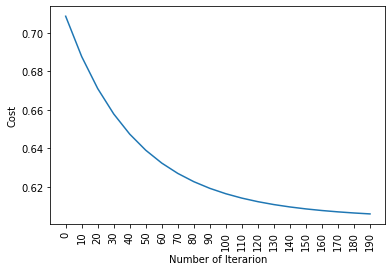

train accuracy: 71.0711441465357 %
test accuracy: 71.8608972657287 %


In [69]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    #update
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate =0.01, num_iterations = 200)

#### ROC Curve with Logistic Regression

In [70]:
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

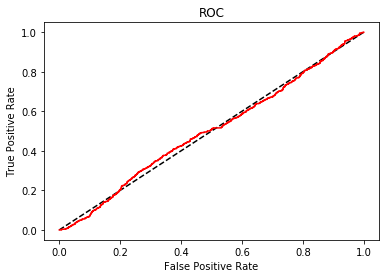

In [71]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [72]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(logreg,x_train,y_train,cv=k)
cross_val_log=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.71068348 0.71068348 0.71068348 0.71068348 0.71068348 0.71068348
 0.71068348 0.71068348 0.71115538 0.71049137]
Cross_val scores average:  0.710711456320262


In [73]:
#GridSearchCV with Logreg
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))
##numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.710711438916891


In [74]:
Logistic_score=logreg_cv.best_score_
CrossVal_Logistic_score=cross_val_log

#### KNN Algorithm

In [75]:
# KNN prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
y=y.astype(int)
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [1 0 0 ... 0 0 0]


In [76]:
#KNN Test
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) train accuracy is:  0.9955534908415185
With KNN (K=3) test accuracy is:  0.7894876559596495


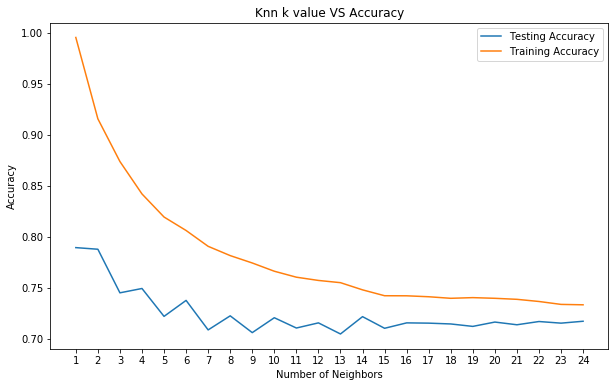

Best accuracy is 0.7894876559596495 with K = 1


In [77]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [78]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(knn,x_train,y_train,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.72594559 0.71267419 0.71001991 0.7146649  0.70670206 0.7146649
 0.71930989 0.71333776 0.71181939 0.71779548]
Cross_val scores average:  0.7146934051011173


In [79]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 2}
Best accuracy: 0.7598627385391378


In [80]:
KKN_Score= max(test_accuracy)
CrossVal_KKN_Score=cv_result_knn

#### SVM

In [81]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

Train accuracy of svm algo: 0.710711441465357
Test accuracy of svm algo: 0.718608972657287


In [82]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,x_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.71068348 0.71068348 0.71068348 0.71068348 0.71068348 0.71068348
 0.71068348 0.71068348 0.71115538 0.71049137]
Cross_val scores average:  0.710711456320262


In [83]:
SVM_score= svm.score(x_test,y_test)
CrossVal_SVM_score=cv_result_svm

In [84]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
cv = GridSearchCV(pipeline,param_grid=parameters,cv=10)
cv.fit(x_train,y_train)
y_pred = cv.predict(x_test)

print("Tuned Model Parameters: {}".format(cv.best_params_))
print("Test accuracy: {}".format(cv.score(x_test, y_test)))

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}
Test accuracy: 0.7990443323599682


#### Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
print("Train accuracy of naive bayes:",nb.score(x_train,y_train))
print("Test accuracy of naive bayes:",nb.score(x_test,y_test))

Train accuracy of naive bayes: 0.710711441465357
Test accuracy of naive bayes: 0.718608972657287


In [86]:
Naive_bayes_score=nb.score(x_test,y_test)

#### Decision Tree Classifier

In [87]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
DecisionTree_score=dt.score(x_test,y_test)
print("Train ccuracy of decision tree:",dt.score(x_train,y_train))
print("Test accuracy of decision tree:",dt.score(x_test,y_test))

Train ccuracy of decision tree: 0.9960844173082029
Test accuracy of decision tree: 0.8213432439607115


In [88]:
from sklearn.model_selection import cross_val_score
k =10
cv_result = cross_val_score(dt,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.79362973 0.79296616 0.79562044 0.77770405 0.79296616 0.77504977
 0.80026543 0.80557399 0.79017264 0.80411687]
Cross_val scores average:  0.7928065221969895


#### Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 3)
rf.fit(x_train,y_train)
print("Train ccuracy of random forest",rf.score(x_train,y_train))
print("Test accuracy of random forest",rf.score(x_test,y_test))
RandomForestClassifier_score=rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
t_true=y_test

Train ccuracy of random forest 0.9960844173082029
Test accuracy of random forest 0.8975311919299177


In [90]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(rf,x_train,y_train,cv=k) # uses R^2 as score 
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.88188454 0.87657598 0.8871931  0.86994028 0.88453882 0.8606503
 0.87524884 0.88586596 0.88047809 0.87981408]
Cross_val scores average:  0.8782189974893614


In [91]:
CrossVal_RandomForestClassifier_score=cv_result_randomforest

#### Confusion Matrix with Random Forest

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[2657   50]
 [ 339  721]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2707
           1       0.94      0.68      0.79      1060

    accuracy                           0.90      3767
   macro avg       0.91      0.83      0.86      3767
weighted avg       0.90      0.90      0.89      3767



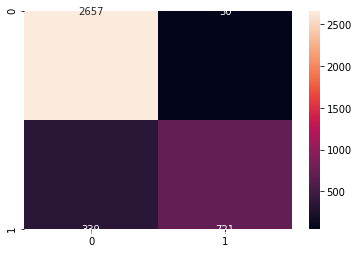

In [93]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [94]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Random Forest', rf), ('Logistic Regression', logreg)], 
                       voting='soft', weights=[2,1]).fit(x_train,y_train)
print('The train accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_train,y_train))
print('The test accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_test,y_test))

The train accuracy for Random Forest and Logistic Regression is: 0.9945580037164853
The test accuracy for Random Forest and Logistic Regression is: 0.8962038757632068


In [95]:
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(ensemble,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.87193099 0.87259456 0.86595886 0.87553933 0.87952207]
Cross_val scores average:  0.873109161340451


### Comparison Of Performance

In [96]:
model_performances=pd.DataFrame({'Model':['RandomForestClassifier','SVM','DesicionTreeClassifier','K-NearestNeighbors','LogisticRegession','NaiveBayes'],
                                 'Accuracy':[RandomForestClassifier_score,SVM_score,DecisionTree_score,KKN_Score,Logistic_score,Naive_bayes_score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

,Model,Accuracy
0,RandomForestClassifier,0.897531
2,DesicionTreeClassifier,0.821343
3,K-NearestNeighbors,0.789488
1,SVM,0.718609
5,NaiveBayes,0.718609
4,LogisticRegession,0.710711


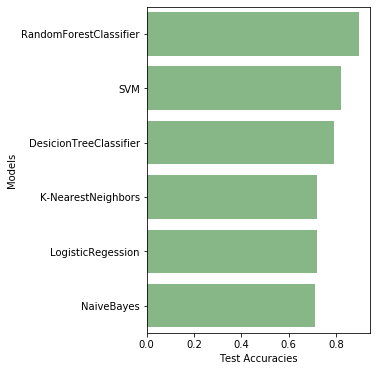

In [97]:
model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['Accuracy'].sort_values(ascending=False))
f,ax = plt.subplots(figsize = (4,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test Accuracies', ylabel='Models')
plt.show()

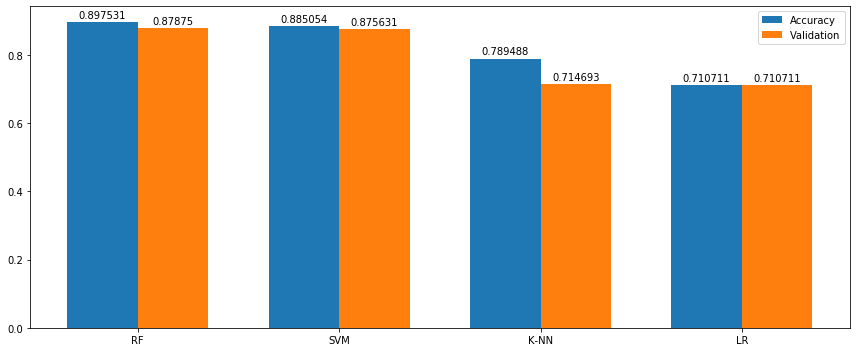

In [98]:
labels = ['RF','SVM', 'K-NN', 'LR']
accuracy = [0.897531,0.885054, 0.789488,0.710711]
validation = [0.878750, 0.875631, 0.714693, 0.710711]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))
rects1 = ax.bar(x - width/2,accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, validation, width, label='Validation')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()